# Image Preprocessing

# Test  Image resize 512*512

In [2]:
#Multiple caries Image Resize 512*512
import PIL
import os
import os.path
from PIL import Image

img_cariestest = r'G:/Dental X-ray/teeth_dataset/teeth_dataset/test/caries'
for file in os.listdir(img_cariestest):
    C_img = img_cariestest+"/"+file
    img = Image.open(C_img)
    img = img.resize((512,512))
    img.save(C_img)
    
#test image no-caries image resize   
img_cariestest = r'G:/Dental X-ray/teeth_dataset/teeth_dataset/test/no-caries'
for file in os.listdir(img_cariestest):
    C_img = img_cariestest+"/"+file
    img = Image.open(C_img)
    img = img.resize((512,512))
    img.save(C_img)

# Training Image resize 512*512

In [3]:
#Multiple caries Image Resize 512*512
import PIL
import os
import os.path
from PIL import Image

img_cariestest = r'G:/Dental X-ray/teeth_dataset/teeth_dataset/Trianing/caries'
for file in os.listdir(img_cariestest):
    C_img = img_cariestest+"/"+file
    img = Image.open(C_img)
    img = img.resize((512,512))
    img.save(C_img)
    
#test image no-caries image resize   
img_cariestest = r'G:/Dental X-ray/teeth_dataset/teeth_dataset/Trianing/without_caries'
for file in os.listdir(img_cariestest):
    C_img = img_cariestest+"/"+file
    img = Image.open(C_img)
    img = img.resize((512,512))
    img.save(C_img)

# Image enhancement

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import matplotlib.image as mpimg
import pandas as pd
import wandb
import random
import numpy as np
from wandb.keras import WandbCallback
import visualkeras

# FIXME: When upload dataset other

In [3]:
data_dir = 'G:/Dental X-ray/teeth_dataset/teeth_dataset'
BASE_DIR = data_dir
train_folder = os.path.join(BASE_DIR,'Trianing')
test_folder = os.path.join(BASE_DIR,'test')
label_ = os.listdir(train_folder)

In [4]:
import albumentations as A

In [5]:
os.makedirs('teeth_dataset',exist_ok=True)
os.makedirs('teeth_dataset/Trianing',exist_ok=True)
os.makedirs('teeth_dataset/test',exist_ok=True)
os.makedirs('teeth_dataset/Trianing/caries',exist_ok=True)
os.makedirs('teeth_dataset/Trianing/without_caries',exist_ok=True)
os.makedirs('teeth_dataset/test/caries',exist_ok=True)
os.makedirs('teeth_dataset/test/no-caries',exist_ok=True)

In [6]:
transform = A.Compose([
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.6),
     A.OneOf([
                        A.MotionBlur(blur_limit=3),
                        A.MedianBlur(blur_limit=3),
                        A.GaussianBlur(blur_limit=(1,3)),
                        A.GaussNoise(var_limit=(5.0, 15.0)),
                    ], p=0.7),
    A.OneOf([
                        A.OpticalDistortion(distort_limit=1.0),
                        A.GridDistortion(num_steps=5, distort_limit=1.),
                        A.ElasticTransform(alpha=3),
                    ], p=0.7),
    A.CLAHE(clip_limit=4.0, p=0.7),
    A.ColorJitter(p=0.7,hue=0.1),
    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, border_mode=0, p=0.85),
    A.CoarseDropout(max_holes=1, max_height=int(50 * 0.375), max_width=int(50 * 0.375), min_holes=1, min_height=None, min_width=None, fill_value=0, mask_fill_value=None, always_apply=False, p=0.7),
    
])

# Test caries

In [7]:
path = os.path.join('G:/Dental X-ray/teeth_dataset/teeth_dataset','test','caries')
path_save = os.path.join('teeth_dataset','test','caries')
for _image in os.listdir(path):
    for i in range(20):
        image = cv2.imread(os.path.join(path,_image))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        transformed = transform(image=image)['image']
        cv2.imwrite(path_save+'/'+_image[:-4]+"_"+str(i)+'.jpg' , transformed)

# Test non-careis

In [8]:
path = os.path.join('G:/Dental X-ray/teeth_dataset/teeth_dataset','test','no-caries')
path_save = os.path.join('teeth_dataset','test','no-caries')
for _image in os.listdir(path):
    for i in range(20):
        image = cv2.imread(os.path.join(path,_image))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        transformed = transform(image=image)['image']
        cv2.imwrite(path_save+'/'+_image[:-4]+"_"+str(i)+'.jpg' , transformed)

# Train caries

In [9]:
path = os.path.join('G:/Dental X-ray/teeth_dataset/teeth_dataset','Trianing','caries')
path_save = os.path.join('teeth_dataset','Trianing','caries')
for _image in os.listdir(path):
    for i in range(20):
        image = cv2.imread(os.path.join(path,_image))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        transformed = transform(image=image)['image']
        cv2.imwrite(path_save+'/'+_image[:-4]+"_"+str(i)+'.jpg' , transformed)

# Train Without_caries

In [10]:
path = os.path.join('G:/Dental X-ray/teeth_dataset/teeth_dataset','Trianing','without_caries')
path_save = os.path.join('teeth_dataset','Trianing','without_caries')
for _image in os.listdir(path):
    for i in range(20):
        image = cv2.imread(os.path.join(path,_image))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        transformed = transform(image=image)['image']
        cv2.imwrite(path_save+'/'+_image[:-4]+"_"+str(i)+'.jpg' , transformed)

# TRAIN TO CSV

In [11]:
#When upload dataset other
BASE2_DIR = 'G:/Dental X-ray/teeth_dataset'
train2_folder = os.path.join(BASE2_DIR,'Trianing')
test2_folder = os.path.join(BASE2_DIR,'test')
label_ = os.listdir(train2_folder)

In [16]:
df_train = pd.Series()
df_image = []
df_label = []

label_num = 0

for i_label in os.listdir(train_folder):
    for j_image in sorted(os.listdir(os.path.join(train_folder,i_label))): #return full images within the folder
        df_image.append(os.path.join('train',i_label,j_image)) # return path_image
        df_label.append(label_num)
    label_num += 1
    df_train['images'] = df_image
    df_train['target'] = df_label
    #caries = 0, no-caries = 1
    df_train.to_csv('./train.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_11060\2853603584.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_train = pd.Series()


# TEST TO CSV

In [17]:
df_test = pd.Series()
df_image = []
df_label = []

label_num = 0

for i_label in os.listdir(test_folder):
    for j_image in sorted(os.listdir(os.path.join(test_folder,i_label))): #return full images within the folder
        df_image.append(os.path.join('test',i_label,j_image))
        df_label.append(label_num)
    label_num += 1
    df_test['images'] = df_image
    df_test['target'] = df_label
#caries = 1, no-caries = 0
    df_test.to_csv('./test.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_11060\213782829.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_test = pd.Series()


In [18]:
df_train.head(30),df_test.tail(14)

(images    [train\caries\wc10.jpg, train\caries\wc11.jpg,...
 target    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
 dtype: object,
 images    [test\caries\wc1.jpg, test\caries\wc2.jpg, tes...
 target           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
 dtype: object)

# VISUALIZATION DATASET

In [15]:
print('Number of train images:',len(df_train))
print('Number of test images:',len(df_test))

Number of train images: 2
Number of test images: 2


# Visualized Caries and without_caries Images in Training

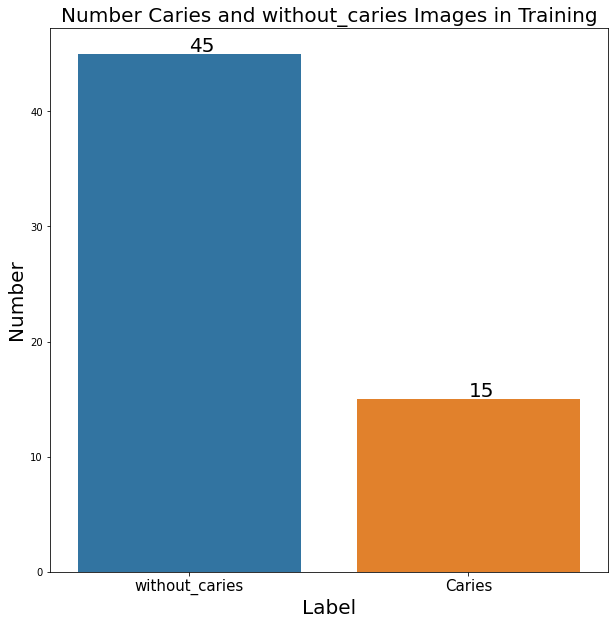

In [18]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x = 'target', data = df_train)
ax.set_title('Number Caries and without_caries Images in Training', size=20)
ax.set_xlabel("Label",fontsize=20)
ax.set_ylabel("Number",fontsize=20)
ax.set_xticklabels(['without_caries', 'Caries'],fontsize=15)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.40, p.get_height()+0.2),fontsize=20)

# Visualized Caries and No-caries Images in Test

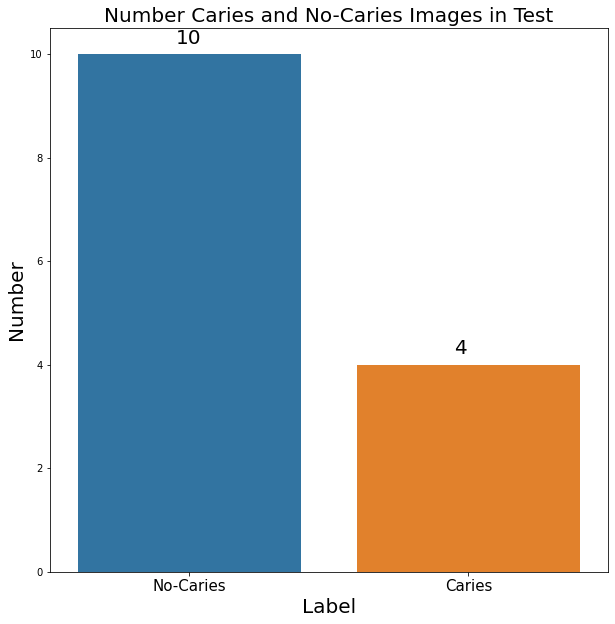

In [19]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x = 'target', data = df_test)
ax.set_title('Number Caries and No-Caries Images in Test', size=20)
ax.set_xlabel("Label",fontsize=20)
ax.set_ylabel("Number",fontsize=20)
ax.set_xticklabels(['No-Caries', 'Caries'],fontsize=15)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.2),fontsize=20)

# import the necessary packages

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
import os
import wandb
from wandb.keras import WandbCallback

# Read Trianing & Test Dir image datat generator

In [44]:
train_dir = "G:/Dental X-ray/teeth_dataset/Trianing"
val_dir = "G:/Dental X-ray/teeth_dataset/test"

train_datagen = ImageDataGenerator( 
    rescale = 1.0/255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=(0.5, 1.5),
)
val_datagen = ImageDataGenerator(rescale=1./255.)

# Found Image Belonging to Classes

In [45]:
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    batch_size=26,
    target_size=(250, 250)
)
val_generator = val_datagen.flow_from_directory(
    val_dir, 
    batch_size=26,
    target_size=(250, 250)
)

Found 1200 images belonging to 2 classes.
Found 280 images belonging to 2 classes.


# VGG16

In [46]:
base_model = VGG16(include_top=False, input_shape=(224, 224, 3))

# VGG16 Model make with activation relu

In [47]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2, activation="softmax"))

# Model Compile

In [48]:
model.compile(
    optimizer=RMSprop(learning_rate=0.00001),
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

# Check Accuracy

In [ ]:
os.makedirs("tmp/vgg16_checkpoints")
checkpoint_callback = ModelCheckpoint(
    filepath="tmp/checkpoint",
    save_weights_only=False,
    save_best_only=True
)
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[
        checkpoint_callback
    ]
)

Epoch 1/10
47/47 [==============================] - ETA: 0s - loss: 0.2249 - accuracy: 0.8933 

INFO:tensorflow:Assets written to: tmp\checkpoint\assets


INFO:tensorflow:Assets written to: tmp\checkpoint\assets


47/47 [==============================] - 830s 18s/step - loss: 0.2249 - accuracy: 0.8933 - val_loss: 0.2698 - val_accuracy: 0.9286
Epoch 2/10
47/47 [==============================] - 842s 18s/step - loss: 0.2069 - accuracy: 0.9108 - val_loss: 0.5458 - val_accuracy: 0.8929
Epoch 3/10
47/47 [==============================] - 633s 13s/step - loss: 0.1971 - accuracy: 0.9133 - val_loss: 0.4062 - val_accuracy: 0.9179
Epoch 4/10
47/47 [==============================] - 630s 13s/step - loss: 0.1722 - accuracy: 0.9267 - val_loss: 0.2763 - val_accuracy: 0.9429
Epoch 5/10
20/47 [===========>..................] - ETA: 5:32 - loss: 0.1594 - accuracy: 0.9438

# ResNet50

In [ ]:
base_model = ResNet50(include_top=False, input_shape=(224, 224, 3))

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2, activation="softmax"))

In [ ]:
model.compile(
    optimizer=RMSprop(learning_rate=0.00001),
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [ ]:
os.makedirs("tmp/resnet_checkpoints")
checkpoint_callback = ModelCheckpoint(
    filepath="tmp/checkpoint",
    save_weights_only=False,
    save_best_only=True
)
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[
        checkpoint_callback
    ]
)

# Mobile Net

In [ ]:
base_model = MobileNet(include_top=False, input_shape=(224, 224, 3))

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2, activation="softmax"))

In [ ]:
model.compile(
    optimizer=RMSprop(learning_rate=0.00001),
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [ ]:
os.makedirs("tmp/mobilenet_checkpoints")
checkpoint_callback = ModelCheckpoint(
    filepath="tmp/checkpoint",
    save_weights_only=False,
    save_best_only=True
)
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[
        checkpoint_callback
    ]
)